In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("avg_t_total.csv")

In [105]:
df.shape

(1649, 8)

In [48]:
df.AVGT = df.AVGT/10

In [49]:
df.MINT,df.MAXT = df.MINT/10, df.MAXT/10

In [50]:
df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,avgt_imf5
0,16.5,10166,10195,10128,12.7,20.4,24,-70.053189
1,14.8,10172,10191,10148,11.7,20.3,28,-69.525181


In [9]:
val_df = pd.read_csv("ICAR-AWS Data_Modified_Req_Features.csv")

In [10]:
val_df.head(2)

,TIMESTAMP,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,WINDSPD
0,2022-02-01,33.176830,1006.039708,1008.148,1003.936,30.26416,36.99384,64.79,0.878080
1,2022-02-02,33.257005,1006.893125,1009.275,1004.576,30.11134,37.36093,52.85,1.096157


In [14]:
val_df.drop(["TIMESTAMP","WINDSPD"],axis=1,inplace=True)

In [16]:
val_df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU
0,33.176830,1006.039708,1008.148,1003.936,30.26416,36.99384,64.79
1,33.257005,1006.893125,1009.275,1004.576,30.11134,37.36093,52.85


In [17]:
val_df.AVGP,val_df.MAXP,val_df.MINP = val_df.AVGP*10,val_df.MAXP*10,val_df.MINP*10

In [18]:
val_df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU
0,33.176830,10060.397083,10081.48,10039.36,30.26416,36.99384,64.79
1,33.257005,10068.931250,10092.75,10045.76,30.11134,37.36093,52.85


<AxesSubplot:>

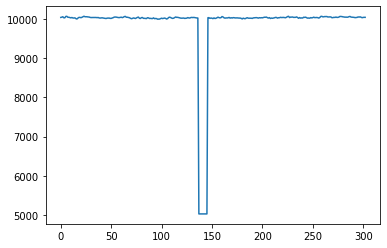

In [32]:
val_df.MINP.plot()

<AxesSubplot:>

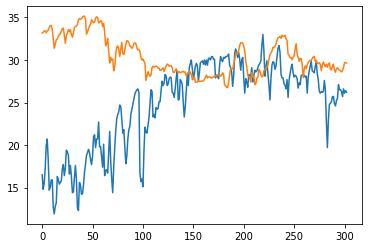

In [36]:
df[:303].AVGT.plot()
val_df.AVGT.plot()

In [37]:
# df.to_csv("./Vald/shenzhen_data_Avgp.csv",index=False)

In [21]:
# val_df.to_csv("./Vald/our_dataset.csv",index=False)

###  EMD

In [22]:
import emd

In [38]:
imf = emd.sift.sift(val_df.AVGT.to_numpy())

In [39]:
imf.shape

(303, 5)

<AxesSubplot:xlabel='Time (samples)'>

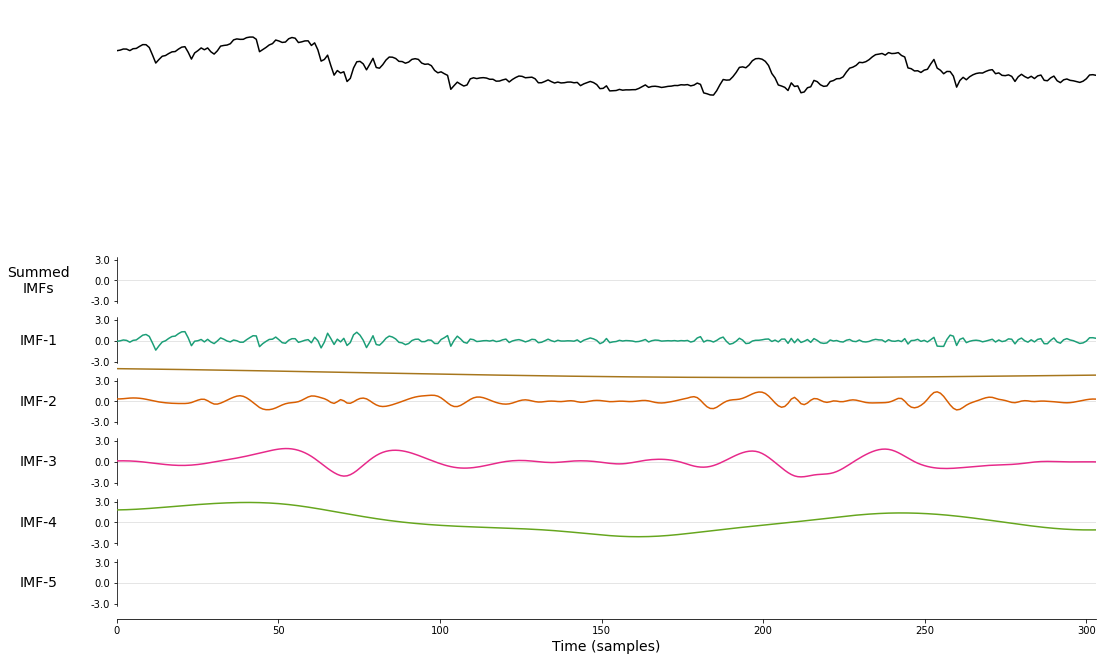

In [40]:
emd.plotting.plot_imfs(imf)

In [41]:
new_df = pd.DataFrame(imf,columns=["imf_1","imf_2","imf_3","imf_4","imf_5"])

In [43]:
new_df['avg_t'] = val_df.AVGT

<AxesSubplot:>

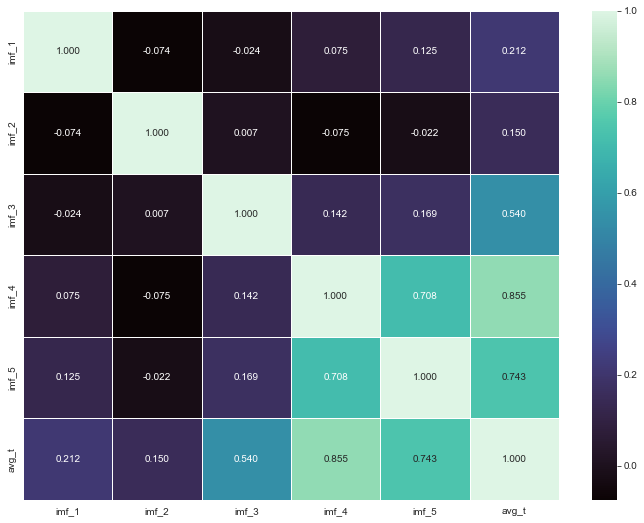

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize = (12,9))
sns.heatmap(new_df.corr('pearson'),cmap="mako",fmt='.3f',annot = True,linewidths=0.5,linecolor="white")

In [51]:
val_df["avgt_imf4"] = new_df.imf_4

In [52]:
val_df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,avgt_imf4
0,33.176830,10060.397083,10081.48,10039.36,30.26416,36.99384,64.79,1.799885
1,33.257005,10068.931250,10092.75,10045.76,30.11134,37.36093,52.85,1.808093


In [53]:
val_df.to_csv("our_dataset_avgt.csv",index=False)

<AxesSubplot:>

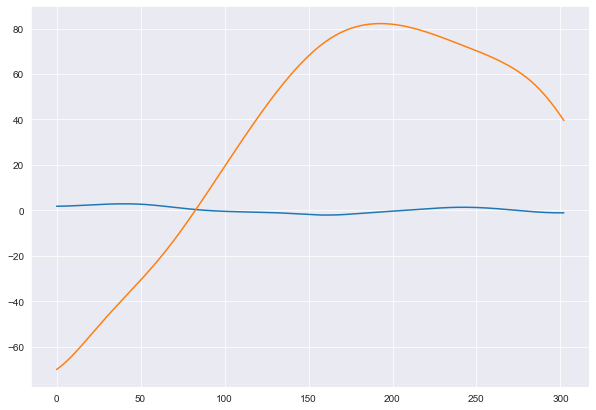

In [108]:
plt.figure(figsize=(10,7))
val_df.avgt_imf4.plot()
df[:303].avgt_imf5.plot()

## Preprocessing training data

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()
scaler = scaler.fit(df)
df_for_training_scaled = scaler.transform(df)

In [57]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 7  # Number of past days we want to use to predict the future.

In [58]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [59]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1642, 7, 8).
trainY shape == (1642, 1).


## Preprocessing training data

In [66]:
val_df.head(2)

,AVGT,AVGP,MAXP,MINP,MINT,MAXT,MINU,avgt_imf4
0,33.176830,10060.397083,10081.48,10039.36,30.26416,36.99384,64.79,1.799885
1,33.257005,10068.931250,10092.75,10045.76,30.11134,37.36093,52.85,1.808093


In [ ]:
val_df

In [61]:
scale = MinMaxScaler()
scale = scale.fit(val_df)
df_for_vald_scaled = scale.transform(val_df)

In [62]:
valdX = []
valdY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 7  # Number of past days we want to use to predict the future.

In [64]:
for i in range(n_past, len(df_for_vald_scaled) - n_future +1):
    valdX.append(df_for_vald_scaled[i - n_past:i, 0:val_df.shape[1]])
    valdY.append(df_for_vald_scaled[i + n_future - 1:i + n_future, 0])

In [65]:
valdX, valdY = np.array(valdX), np.array(valdY)

print('valX shape == {}.'.format(valdX.shape))
print('valY shape == {}.'.format(valdY.shape))

valX shape == (296, 7, 8).
valY shape == (296, 1).


## Training

In [54]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

In [67]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu',return_sequences=False))
model.add(Dense(trainX.shape[2]))

opt = keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             11800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 8)                 408       
Total params: 52,608
Trainable params: 52,608
Non-trainable params: 0
_________________________________________________________________


In [68]:
history1 = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_data=(valdX,valdY), verbose=1)

Epoch 1/30
103/103 [==============================] - 16s 93ms/step - loss: 44154.7656 - val_loss: 0.1264
Epoch 2/30
103/103 [==============================] - 9s 84ms/step - loss: 0.0116 - val_loss: 0.0656
Epoch 3/30
103/103 [==============================] - 9s 84ms/step - loss: 0.0094 - val_loss: 0.0316
Epoch 4/30
103/103 [==============================] - 9s 83ms/step - loss: 0.0065 - val_loss: 0.0304
Epoch 5/30
103/103 [==============================] - 9s 85ms/step - loss: 0.0052 - val_loss: 0.0278
Epoch 6/30
103/103 [==============================] - 9s 85ms/step - loss: 0.0062 - val_loss: 0.0205
Epoch 7/30
103/103 [==============================] - 8s 82ms/step - loss: 0.0044 - val_loss: 0.0243
Epoch 8/30
103/103 [==============================] - 9s 86ms/step - loss: 0.0046 - val_loss: 0.0216
Epoch 9/30
103/103 [==============================] - 9s 86ms/step - loss: 0.0041 - val_loss: 0.0211
Epoch 10/30
103/103 [==============================] - 9s 84ms/step - loss: 0.0050 - v

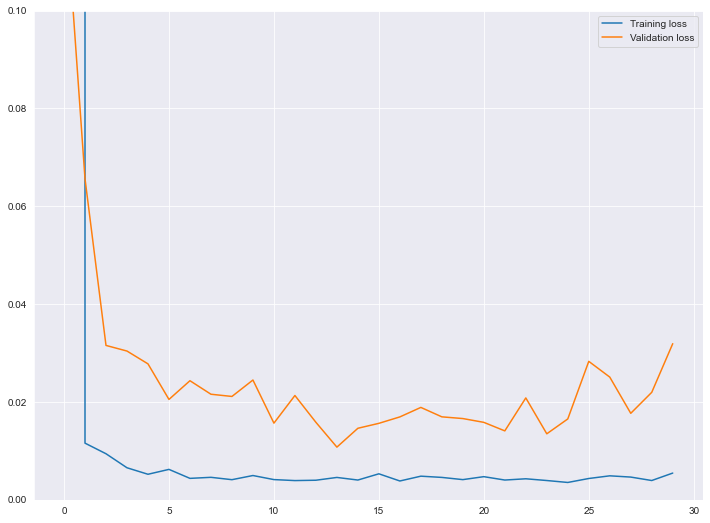

In [70]:
plt.figure(figsize=(12,9))
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.ylim((0,0.1))
plt.legend()

In [71]:
forecast1 = model.predict(trainX[-50:])

In [78]:
forecast = forecast1[:,0]

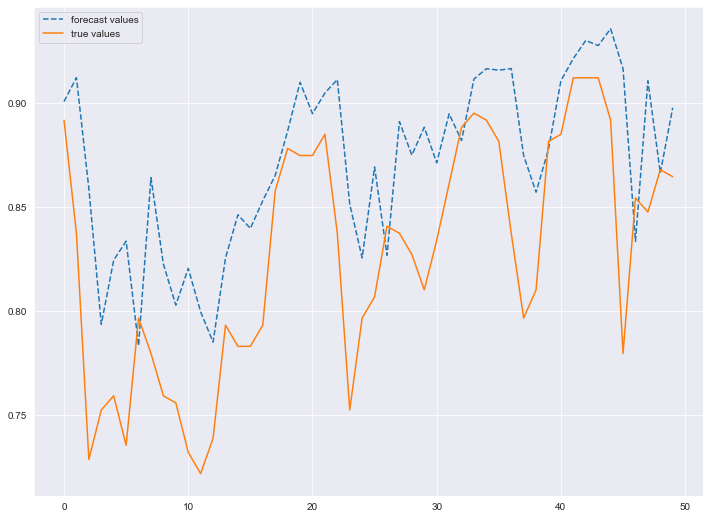

In [79]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
plt.plot(forecast,linestyle="--",label="forecast values")
plt.plot(trainY[-50:],label="true values")
plt.legend()

### future prediction

In [83]:
valdX[-1:].shape

(1, 7, 8)

In [84]:
future_predictions = []  ## list of future values

current_batch = valdX[-1:]   ## using the last 7 days of past to predict the next future day

for _ in range(10):    ## iterating the same for 10 days future forecast
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)
    
    print("Current_pred: {}".format(current_pred))
    # append the prediction into the array
    future_predictions.append(current_pred[0][0])
    
    # use the prediction to update the batch and remove the first value
    current_batch= np.delete(current_batch,0,axis=1)
    current_pred = current_pred.reshape((1,1,8))
    current_batch = np.append(current_batch,current_pred,axis=1)
    
    print("Current_batch: {}".format(current_batch))

Current_pred: [[0.486347   0.48488894 0.4889303  0.48886096 0.48472115 0.48905665
  0.48648357 0.48479238]]
Current_batch: [[[0.23253791 0.99588436 0.99464096 0.99566241 0.15246508 0.33480279
   0.40862783 0.20439785]
  [0.21864384 0.99643671 0.99580759 0.99693175 0.14652248 0.29331628
   0.51782872 0.2015688 ]
  [0.23963659 0.99505781 0.99509738 0.99477783 0.1793117  0.30668354
   0.5889844  0.19955376]
  [0.28074752 0.99241533 0.99137124 0.99268539 0.23418394 0.33082556
   0.62798472 0.19836692]
  [0.34681217 0.99304308 0.9915601  0.99405391 0.28760303 0.40109781
   0.54170646 0.19798722]
  [0.35180828 0.99443055 0.99318906 0.99456561 0.3547981  0.360531
   0.62893983 0.19838477]
  [0.48634699 0.48488894 0.48893031 0.48886096 0.48472115 0.48905665
   0.48648357 0.48479238]]]
Current_pred: [[0.6094117  0.6084851  0.60890675 0.6094425  0.6080357  0.6094763
  0.60839397 0.60640955]]
Current_batch: [[[0.21864384 0.99643671 0.99580759 0.99693175 0.14652248 0.29331628
   0.51782872 0.20156

In [86]:
forecast2 = model.predict(valdX)

In [89]:
forecast2.shape

(296, 8)

In [94]:
forecast_val = forecast2[:,0]

In [95]:
forecast_val.shape

(296,)

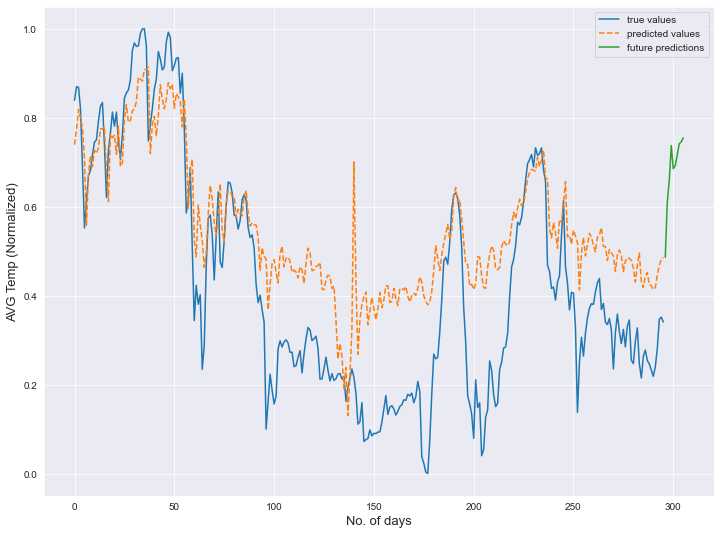

In [107]:
plt.figure(figsize=(12,9))
plt.plot(valdY[-296:],label= "true values")
plt.plot(forecast_val,linestyle='--',label="predicted values")
plt.plot(len(valdY[-296:])+np.arange(0,10,1),future_predictions,label="future predictions")
plt.xlabel("No. of days",fontsize=13)
plt.ylabel("AVG Temp (Normalized)",fontsize=13)
plt.legend();